# **Random Forest 예제**

## **1. 데이터 로드**
###데이터 정보
* Personal Key Indicators of Heart Disease  
(2020 annual CDC survey data of 400k adults related to their health status)  
* Source : https://www.cdc.gov/brfss/annual_data/annual_2020.html
* Offer : Kaggle
* License : Public Domain
* Collaborators : Kamil Pytlak

In [39]:
#데이터 로드
################################################################################
import pandas as pd

url = "https://raw.githubusercontent.com/iheesung/lec_22_1_ai_groupProject/main/heart_2020_cleaned.csv"
df = pd.read_csv(url)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [40]:
#데이터 헤더
################################################################################
list(df)

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [41]:
#데이터 형태
################################################################################
nRow = df.shape[0] # 데이터 개수
nCol = df.shape[1] # 변수 개수
print('nRow: %d' % nRow, '/ nCol: %d' % nCol )
df.info()

nRow: 319795 / nCol: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 

###1.1 데이터 구조
*   데이터 개수  : 319795 개 (헤더 제외)  
*   변수 개수: 18 개


###1.2 변수 구분
*  설명 변수
  1. BMI : 체질량 지수
  2. Smoking : 흡연
  3. AlcoholDrinking : 음주
  4. Stroke : 뇌졸중
  5. PhysicalHealth : 육체적 건강
  6. MentalHealth : 정신적 건강 
  7. DiffWalking : 걷기 장애
  8. Sex : 성별
  9. AgeCategory : 나이대
  10. Race : 인종
  11. Diabetic : 당뇨
  12. PhysicalActivity : 신체 활동
  13. GenHealth : 일반적 건강 (본인 판단)
  14. SleepTime : 수면 시간
  15. Asthma : 소아 천식
  16. KidneyDisease : 신장 질환
  17. SkinCancer : 피부암
*   반응 변수
  1.   HeartDisease : 심장병

## **2. 데이터 전처리**


*   사이킷런(scikit-learn)은 문자열 값을 입력값으로 처리 하지 않기 때문에 숫자형으로 변환함
*   처리 방법 : Label Encoding (숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델 적용 가능)




In [42]:
#범주형 데이터 형변환 (Label Encoding)
################################################################################
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [43]:
#형변환 결과 확인
################################################################################
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


## **3. 데이터셋 분리**


*   학습데이터와 평가데이터의 비율을 7:3 로 분할함

In [102]:
#데이터셋 분리
################################################################################
from sklearn.model_selection import train_test_split

x = df.drop(labels='HeartDisease',axis=1)
y = df['HeartDisease']

#학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #random_state 입력 시, 데이터 일관적인 데이터 분할 (입력값은 중요하지 않음)

In [108]:
print(x_train.shape)
x_train.head()

(223856, 17)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
303145,20.51,0,0,0,4.0,0.0,0,1,5,0,0,1,0,8.0,0,0,0
61634,30.82,0,0,0,0.0,0.0,0,1,10,5,1,1,1,7.0,0,1,0
117690,33.91,0,0,0,0.0,0.0,0,0,6,0,1,1,2,6.0,0,0,0
132104,21.59,1,0,0,0.0,0.0,0,0,12,0,0,1,1,8.0,0,0,0
262165,25.75,0,0,0,0.0,0.0,0,1,11,0,0,1,1,7.0,1,0,0


In [109]:
print(x_test.shape)
x_test.head()

(95939, 17)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,27.63,1,0,0,0.0,25.0,0,1,1,1,0,1,1,7.0,0,0,0
270361,21.95,0,0,0,0.0,20.0,0,1,2,0,0,1,0,6.0,0,0,1
219060,31.32,1,0,0,0.0,0.0,0,1,4,0,0,1,1,6.0,1,0,0
24010,40.35,0,0,0,30.0,0.0,0,1,9,0,0,0,2,8.0,0,0,0
181930,35.61,1,0,0,30.0,30.0,1,1,8,0,0,0,3,4.0,1,0,1


In [113]:
print(y_train.shape)
y_train.head()

(223856,)


303145    0
61634     0
117690    0
132104    0
262165    0
Name: HeartDisease, dtype: int64

In [114]:
print(y_test.shape)
y_test.head()

(95939,)


271884    0
270361    0
219060    0
24010     0
181930    0
Name: HeartDisease, dtype: int64

## **4. 분류기(Classifier) 생성**


*   DecisionTree 분류기와 RandomForest 분류기 객체 생성

In [115]:
#분류기 객체 생성
################################################################################
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

## **5. 분류기(Classifier) 성능 비교**


*   Decision Tree 분류기와 Random Forest 분류기 성능 평가



In [118]:
#분류기 성능 비교
################################################################################
from sklearn.metrics import accuracy_score


estimators = [dt_clf, rf_clf]
for estimator in estimators:
    estimator.fit(x_train, y_train)
    pred = estimator.predict(x_test)
    class_name = estimator.__class__.__name__
    print('{} 분류기 정확도: {}'.format(class_name, accuracy_score(y_test, pred)))

DecisionTreeClassifier 분류기 정확도: 0.8631213583631265
RandomForestClassifier 분류기 정확도: 0.905106369672396


## **6. 분류기(Classifier) 성능 개선**





####6.1 하이퍼 파라미터

#####6.1.1 n_estimators

> - 결정트리의 갯수를 지정
- Default = 10
- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음


#####6.1.2 max_depth 

> - 트리의 최대 깊이
- default=None
- 모든 잎에 min_samples_split 샘플 미만이 포함될 때까지 노드 확장


#####6.1.3 min_samples_split

> - 노드를 분할하기 위한 최소한의 샘플 데이터수
→ 과적합을 제어하는데 사용
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가


#####6.1.4 min_samples_leaf

> - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요



#####6.1.5 max_features	


> - 최적의 분할을 위해 고려할 최대 feature 개수
- Default = 'auto' (결정트리에서는 default가 none이었음)
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
- 기본 max_features는 sqrt와 같으므로 전체 피처가 16개라면 분할을 위해 4개의 피처를 참조
- max_features 값을 크게 하면 RandomForest의 트리들은 비슷해지고 가장 두드러진 특성을 이용해 데이터에 에 Fit하게됨
- max_features 값을 작게 하면 트리들은 서로 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어짐

#####6.1.6 min_samples_leaf

> - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요


#####6.1.7 max_leaf_nodes	

> - 리프노드의 최대 개수

####6.2 하이퍼 파라미터 튜닝

In [128]:
#하이퍼 파라미터 튜닝 Part 1 (실행 시간 : 3분 34초)
################################################################################
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10], # 결정트리 개수
    'max_depth':[2 ,4 ,6, 8, 10, 12, 14], # 트리의 최대 깊이
    'min_samples_leaf':[2 ,4, 6, 8, 10], # 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
    'min_samples_split':[2 ,4, 6, 8, 10] # 노드를 분할하기 위한 최소한의 샘플 데이터수
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

최적의 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}
최적의 예측 정확도 : 0.9161157172468015


In [153]:
#하이퍼 파라미터 튜닝 Part 2 (실행 시간 : 2분 41초)
################################################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 50):
    rf_clf = RandomForestClassifier(n_estimators=k,
                                    max_depth = 10,
                                    min_samples_leaf = 2,
                                    min_samples_split = 8,
                                    n_jobs = -1)
    rf_clf.fit(x_train, y_train)
    y_pred = rf_clf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

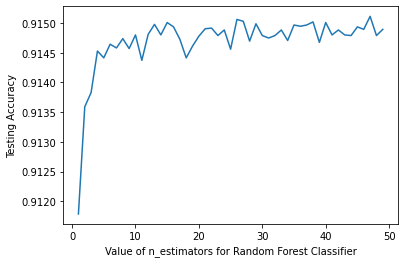

In [154]:
#n_estimators에 따른 예측 정확도 변화
################################################################################
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 50), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

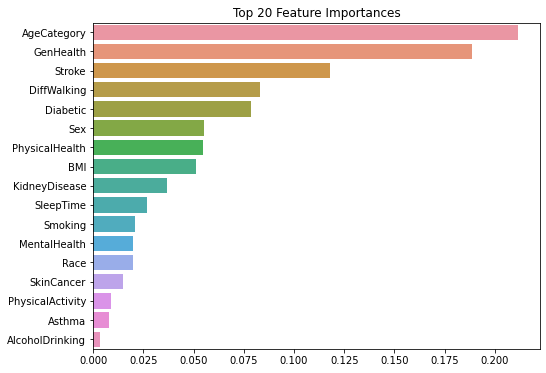

In [155]:
#Random Forest 각 피처의 중요도 
################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

*   AgeCategory : 나이대
*   GenHealth : 일반적 건강 (본인 판단)
*   Stroke : 뇌졸중
*   DiffWalking : 걷기 장애
*   Diabetic : 당뇨
